# MNIST

This notebook is a playground for experimenting with various computer vision paradigms on the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset.

Load the necesary libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from itertools import product
import numpy as np

Download the MNIST dataset, which consists of 60000 training and 10000 test images of handwritten digits

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11493376/11490434 [==============================] - 0s 0us/step


Let's take a look at some of the images

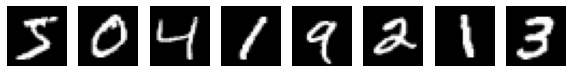

In [3]:
nr_of_images = 8

fig = plt.figure(figsize=(10,10))

for i in range(nr_of_images):
  fig.add_subplot(1, nr_of_images, i+1)
  plt.imshow(x_train[i], cmap="gray")
  plt.axis('off')


## Feature Extraction

### Filter

Let's experiment with various kernels and filter the images for various features.

In [4]:
def plot_kernels(kernels):
  """ Plot the given kernels in one row

  This will plot given kernels 

  Parameters:
    kernels (list of Tensorflow.Tensor): An array containing 2d tensors with shape (n, n)
                 
  Returns:
    None

  Slight adaption of https://github.com/Kaggle/learntools/blob/355a5df6a66562de62254b723da1a9389b9acc49/learntools/computer_vision/visiontools.py

  """

  nr_of_kernels = len(kernels)
  
  fig = plt.figure(figsize=(10, 10))

  for i in range(nr_of_kernels):
    kernel = np.array(kernels[i])
    fig.add_subplot(1, nr_of_kernels, i+1)
    cmap = plt.get_cmap('Blues_r')
    thresh = (kernel.max()+kernel.min())/2
    plt.imshow(kernel, cmap=cmap)
    plt.axis('off')
    rows, cols = kernel.shape
    for r, c in product(range(rows), range(cols)):
      val = kernel[r, c]
      color = cmap(0) if val > thresh else cmap(255)
      plt.text(c,r, val, 
              color=color, size=20,
              horizontalalignment='center', verticalalignment='center')


#### Constant Kernel
First define some kernels. We will start with common 3x3 kernels.

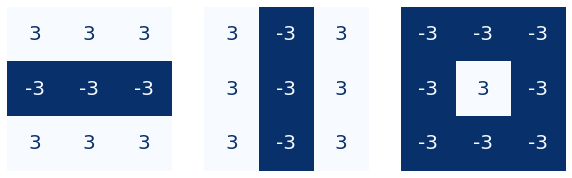

In [5]:
kernel1 = tf.constant([
      [3,3,3],
      [-3,-3,-3],
      [3,3,3]
])

kernel2 = tf.constant([
      [3,-3,3],
      [3,-3,3],
      [3,-3,3]
])

kernel3 = tf.constant([
      [-3,-3,-3],
      [-3,3,-3],
      [-3,-3,-3]
])

constant_kernels = [kernel1, kernel2, kernel3]

plot_kernels(constant_kernels)

In [16]:
image = x_train[0]
kernel = constant_kernels[0]


"""
image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME',
  )

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.show();
"""

"\nimage_filter = tf.nn.conv2d(\n    input=image,\n    filters=kernel,\n    strides=1,\n    padding='SAME',\n  )\n\nplt.figure(figsize=(6, 6))\nplt.imshow(tf.squeeze(image_filter))\nplt.axis('off')\nplt.show();\n"

#### Random Kernel
Next we can also take some random kernels to see their results. However it might be more difficult to see the pattern here.

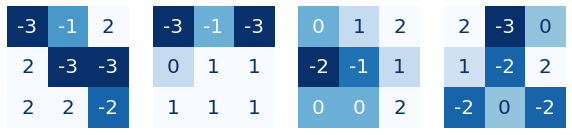

In [12]:
nr_of_random_kernels = 4

random_kernels = [tf.random.uniform(shape=[3,3], minval=-3, maxval=3, dtype=tf.int32, seed=10) for i in range(nr_of_random_kernels)]


plot_kernels(random_kernels)

In [8]:
model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3),
])